# Les imports 

In [1]:
# --- Notebook : Modèle Linéaire - Cas de Tests de Régression ---
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# === Chargement de la bibliothèque Rust compilée ===
lib = ctypes.CDLL("../../../target/release/mymodel.dll")

In [3]:
lib.create_linear_model_pseudo_inverse.argtypes = [
    ctypes.POINTER(ctypes.c_double),  # X
    ctypes.POINTER(ctypes.c_double),  # Y
    ctypes.c_size_t,                  # n_samples
    ctypes.c_size_t                   # n_features
]
lib.create_linear_model_pseudo_inverse.restype = ctypes.c_void_p

lib.predict_linear_model_pseudo_inverse.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t
]
lib.predict_linear_model_pseudo_inverse.restype = ctypes.c_double

# Déclarations ctypes
lib.get_model_bias.argtypes = [ctypes.c_void_p]
lib.get_model_bias.restype = ctypes.c_double

lib.get_model_weights_ptr.argtypes = [ctypes.c_void_p]
lib.get_model_weights_ptr.restype = ctypes.POINTER(ctypes.c_double)

lib.get_model_weights_len.argtypes = [ctypes.c_void_p]
lib.get_model_weights_len.restype = ctypes.c_size_t



## Régression

### Linear Simple 2D :
        Linear Model : OK
        

x = 1.0 → y attendu = 2.0, y prédit = 2.000
x = 2.0 → y attendu = 3.0, y prédit = 3.000

MAE (erreur absolue moyenne) : 0.0000
RMSE (erreur quadratique moyenne) : 0.0000
Précision relative : 100.00%


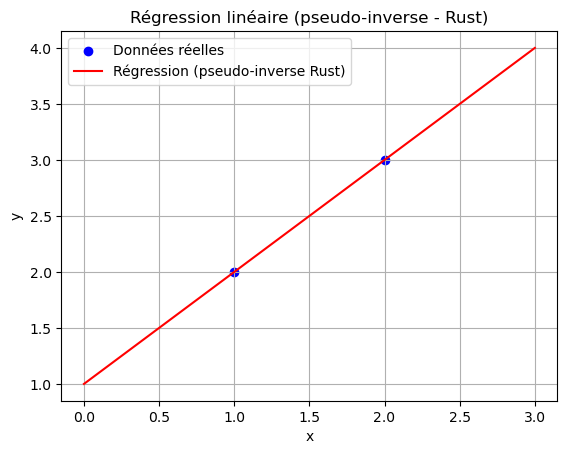

In [4]:
# === Données ===
X = np.array([[1], [2]], dtype=np.float64)
Y = np.array([2, 3], dtype=np.float64)
n_samples, n_features = X.shape

# === Créer et entraîner le modèle PSEUDO-INVERSE (en une seule étape) ===
X_flat = X.flatten().astype(np.float64)
Y_float = Y.astype(np.float64)

model_ptr = lib.create_linear_model_pseudo_inverse(
    X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features
)

# === Prédiction sur X
Y_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in X
])

# === Affichage résultats
for x, y_true, y_hat in zip(X, Y, Y_pred):
    print(f"x = {x[0]:.1f} → y attendu = {y_true:.1f}, y prédit = {y_hat:.3f}")

mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(np.mean((Y - Y_pred)**2))
value_range = Y.max() - Y.min()
accuracy_pct = 100 * (1 - rmse / value_range) if value_range > 0 else 100.0

print(f"\nMAE (erreur absolue moyenne) : {mae:.4f}")
print(f"RMSE (erreur quadratique moyenne) : {rmse:.4f}")
print(f"Précision relative : {accuracy_pct:.2f}%")

# === Affichage graphique
x_test = np.linspace(0, 3, 100).reshape(-1, 1)
y_test_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in x_test
])

plt.scatter(X, Y, label="Données réelles", color="blue")
plt.plot(x_test, y_test_pred, color="red", label="Régression (pseudo-inverse Rust)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression linéaire (pseudo-inverse - Rust)")
plt.legend()
plt.grid(True)
plt.show()


### Non Linear Simple 2D :
        Linear Model    : OK

x = 1.0 → y attendu = 2.0, y prédit = 2.250
x = 2.0 → y attendu = 3.0, y prédit = 2.500
x = 3.0 → y attendu = 2.5, y prédit = 2.750

MAE (erreur absolue moyenne) : 0.3333
RMSE (erreur quadratique moyenne) : 0.3536
Précision relative : 64.64%


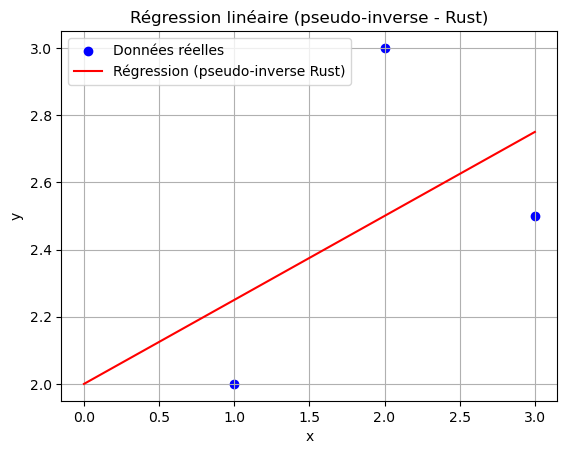

Biais : 2.000000000000001


In [5]:
X = np.array([[1], [2], [3]], dtype=np.float64)
Y = np.array([2, 3, 2.5], dtype=np.float64)
n_samples, n_features = X.shape

# === Créer et entraîner le modèle PSEUDO-INVERSE (en une seule étape) ===
X_flat = X.flatten().astype(np.float64)
Y_float = Y.astype(np.float64)

model_ptr = lib.create_linear_model_pseudo_inverse(
    X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features
)

# === Prédiction sur X
Y_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in X
])

# === Affichage résultats
for x, y_true, y_hat in zip(X, Y, Y_pred):
    print(f"x = {x[0]:.1f} → y attendu = {y_true:.1f}, y prédit = {y_hat:.3f}")

mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(np.mean((Y - Y_pred)**2))
value_range = Y.max() - Y.min()
accuracy_pct = 100 * (1 - rmse / value_range) if value_range > 0 else 100.0

print(f"\nMAE (erreur absolue moyenne) : {mae:.4f}")
print(f"RMSE (erreur quadratique moyenne) : {rmse:.4f}")
print(f"Précision relative : {accuracy_pct:.2f}%")

# === Affichage graphique
x_test = np.linspace(0, 3, 100).reshape(-1, 1)
y_test_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in x_test
])

plt.scatter(X, Y, label="Données réelles", color="blue")
plt.plot(x_test, y_test_pred, color="red", label="Régression (pseudo-inverse Rust)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression linéaire (pseudo-inverse - Rust)")
plt.legend()
plt.grid(True)
plt.show()

# Appels
bias = lib.get_model_bias(model_ptr)
print("Biais :", bias)




### Linear Simple 3D :
        Linear Model    : OK

x = 1.0 → y attendu = 2.0, y prédit = 2.000
x = 2.0 → y attendu = 3.0, y prédit = 3.000
x = 3.0 → y attendu = 2.5, y prédit = 2.500

MAE (erreur absolue moyenne) : 0.0000
RMSE (erreur quadratique moyenne) : 0.0000
Précision relative : 100.00%


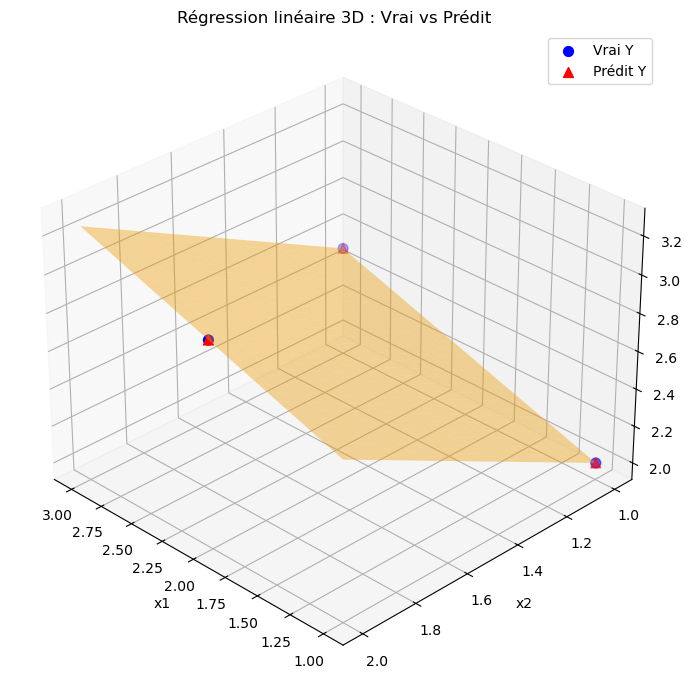

In [6]:

X = np.array([
    [1, 1],
    [2, 2],
    [3, 1]
])

Y = np.array([2, 3, 2.5])

n_samples, n_features = X.shape

# === Créer et entraîner le modèle PSEUDO-INVERSE (en une seule étape) ===
X_flat = X.flatten().astype(np.float64)
Y_float = Y.astype(np.float64)

model_ptr = lib.create_linear_model_pseudo_inverse(
    X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features
)

# === Prédiction sur X
Y_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in X
])



# === Affichage résultats
for x, y_true, y_hat in zip(X, Y, Y_pred):
    print(f"x = {x[0]:.1f} → y attendu = {y_true:.1f}, y prédit = {y_hat:.3f}")

mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(np.mean((Y - Y_pred)**2))
value_range = Y.max() - Y.min()
accuracy_pct = 100 * (1 - rmse / value_range) if value_range > 0 else 100.0

print(f"\nMAE (erreur absolue moyenne) : {mae:.4f}")
print(f"RMSE (erreur quadratique moyenne) : {rmse:.4f}")
print(f"Précision relative : {accuracy_pct:.2f}%")

# === Visualisation 3D pour 2 features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Points réels (Y) en bleu
ax.scatter(X[:, 0], X[:, 1], Y, c='blue', label="Vrai Y", s=50)

# Points prédits (predictions) en rouge
ax.scatter(X[:, 0], X[:, 1], Y_pred, c='red', label="Prédit Y", marker='^', s=50)

# Segments entre vrai et prédit
for i in range(len(Y)):
    x0, x1 = X[i, 0], X[i, 1]
    y_true = Y[i]
    y_pred = Y_pred[i]
    ax.plot([x0, x0], [x1, x1], [y_true, y_pred], color='gray', linestyle='--', linewidth=1)

# Grille pour surface
x_grid, y_grid = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
)

xy_grid = np.c_[x_grid.ravel(), y_grid.ravel()]  # 2 colonnes seulement

z_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        point.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    ) for point in xy_grid
])
z_grid = z_pred.reshape(x_grid.shape)

# Surface prédite
ax.plot_surface(x_grid, y_grid, z_grid, color='orange', alpha=0.4)

# Axes et titres
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Régression linéaire 3D : Vrai vs Prédit")

ax.view_init(elev=30, azim=135)
ax.legend()
plt.tight_layout()
plt.show()


# Exemple supl

x = 1.0 → y attendu = 2.5, y prédit = 2.500
x = 0.0 → y attendu = 1.0, y prédit = 1.000
x = 3.0 → y attendu = 7.5, y prédit = 7.500
x = 2.0 → y attendu = 4.0, y prédit = 4.000
x = 1.0 → y attendu = 3.0, y prédit = 3.000

MAE (erreur absolue moyenne) : 0.0000
RMSE (erreur quadratique moyenne) : 0.0000
Précision relative : 100.00%
Biais : 1.0000000000000022
Poids : [ 2.  -1.   0.5]


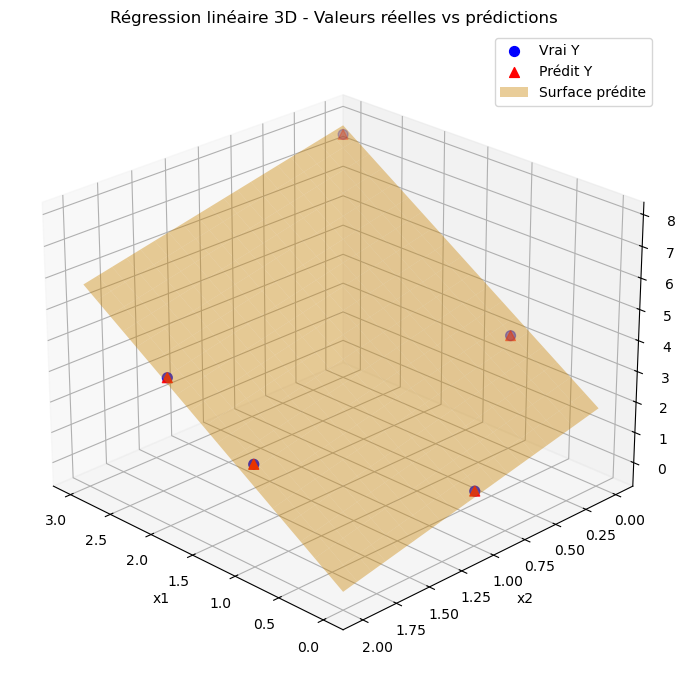

In [12]:

X = np.array([
    [1, 2, 3],
    [0, 1, 2],
    [3, 0, 1],
    [2, 2, 2],
    [1, 0, 0]
])

# Calcul de y avec la fonction y = 2*x1 - x2 + 0.5*x3 + 1
Y = np.array([
    2*1 - 2 + 0.5*3 + 1,   # 2 - 2 + 1.5 + 1 = 2.5
    2*0 - 1 + 0.5*2 + 1,   # 0 - 1 + 1 + 1 = 1.0
    2*3 - 0 + 0.5*1 + 1,   # 6 + 0 + 0.5 + 1 = 7.5
    2*2 - 2 + 0.5*2 + 1,   # 4 - 2 + 1 + 1 = 4.0
    2*1 - 0 + 0.5*0 + 1    # 2 + 0 + 0 + 1 = 3.0
])

n_samples, n_features = X.shape

# === Créer et entraîner le modèle PSEUDO-INVERSE (en une seule étape) ===
X_flat = X.flatten().astype(np.float64)
Y_float = Y.astype(np.float64)

model_ptr = lib.create_linear_model_pseudo_inverse(
    X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features
)

# === Prédiction sur X
Y_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in X
])



# === Affichage résultats
for x, y_true, y_hat in zip(X, Y, Y_pred):
    print(f"x = {x[0]:.1f} → y attendu = {y_true:.1f}, y prédit = {y_hat:.3f}")

mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(np.mean((Y - Y_pred)**2))
value_range = Y.max() - Y.min()
accuracy_pct = 100 * (1 - rmse / value_range) if value_range > 0 else 100.0

print(f"\nMAE (erreur absolue moyenne) : {mae:.4f}")
print(f"RMSE (erreur quadratique moyenne) : {rmse:.4f}")
print(f"Précision relative : {accuracy_pct:.2f}%")

# === Affichage graphique
x_test = np.linspace(0, 3, 100).reshape(-1, 1)
y_test_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in x_test
])

# Appels
bias = lib.get_model_bias(model_ptr)
print("Biais :", bias)

weights_len = lib.get_model_weights_len(model_ptr)
weights_ptr = lib.get_model_weights_ptr(model_ptr)
weights_array = np.ctypeslib.as_array(weights_ptr, shape=(weights_len,))
print("Poids :", weights_array)


# === Visualisation 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# === Points réels (Y) en bleu
ax.scatter(X[:, 0], X[:, 1], Y, c='blue', label="Vrai Y", s=50)

# === Points prédits (predictions) en rouge
ax.scatter(X[:, 0], X[:, 1], Y_pred, c='red', label="Prédit Y", marker='^', s=50)

# === Segments entre vrai et prédit
for i in range(len(Y)):
    x0, x1 = X[i, 0], X[i, 1]
    y_true = Y[i]
    y_pred = Y_pred[i]
    ax.plot([x0, x0], [x1, x1], [y_true, y_pred], color='gray', linestyle='--', linewidth=1)

# === Surface de prédiction avec x3 constant (ex: moyenne)
x_grid, y_grid = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 20),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
)

x3_const = X[:, 2].mean()
xyz_grid = np.c_[
    x_grid.ravel(),
    y_grid.ravel(),
    np.full(x_grid.size, x3_const)
]

z_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        point.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    ) for point in xyz_grid
])
z_grid = z_pred.reshape(x_grid.shape)

# === Surface prédite
ax.plot_surface(x_grid, y_grid, z_grid, color='orange', alpha=0.4, label="Surface prédite")

# === Axes et titre
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Régression linéaire 3D - Valeurs réelles vs prédictions")

# === Légende et vue
ax.view_init(elev=25, azim=135)  # Orientation 3D
ax.legend()

plt.tight_layout()
plt.show()

# Exemple d'une matrice dont XᵗX est inversible (le modèle prédit les bons résultats contrairement avec la moindre carrée )

x = 1.0 → y attendu = 3.0, y prédit = 3.000
x = 2.0 → y attendu = 6.0, y prédit = 6.000
x = 3.0 → y attendu = 9.0, y prédit = 9.000

MAE (erreur absolue moyenne) : 0.0000
RMSE (erreur quadratique moyenne) : 0.0000
Précision relative : 100.00%


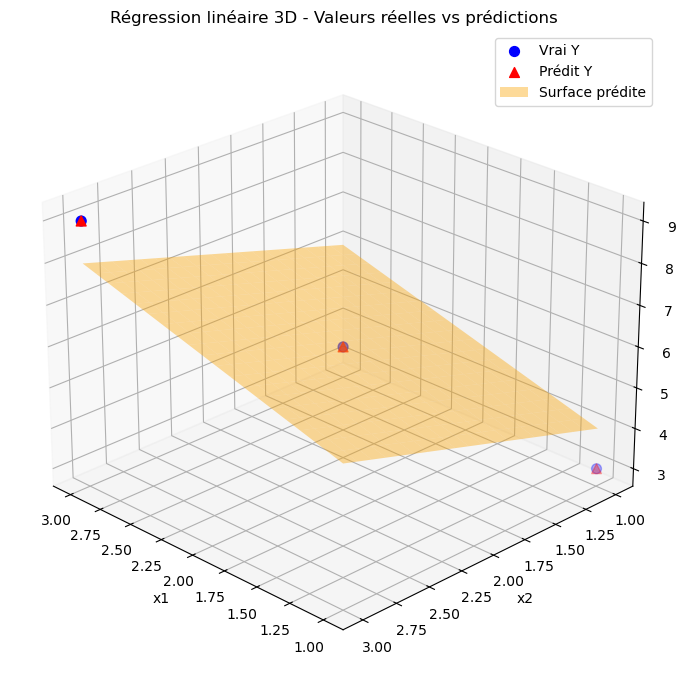

In [ ]:
X = np.array([
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3]
])

Y = np.array([3, 6, 9])

n_samples, n_features = X.shape 

# === Créer et entraîner le modèle PSEUDO-INVERSE (en une seule étape) ===
X_flat = X.flatten().astype(np.float64)
Y_float = Y.astype(np.float64)

model_ptr = lib.create_linear_model_pseudo_inverse(
    X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features
)

# === Prédiction sur X
Y_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in X
])



# === Affichage résultats
for x, y_true, y_hat in zip(X, Y, Y_pred):
    print(f"x = {x[0]:.1f} → y attendu = {y_true:.1f}, y prédit = {y_hat:.3f}")

mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(np.mean((Y - Y_pred)**2))
value_range = Y.max() - Y.min()
accuracy_pct = 100 * (1 - rmse / value_range) if value_range > 0 else 100.0

print(f"\nMAE (erreur absolue moyenne) : {mae:.4f}")
print(f"RMSE (erreur quadratique moyenne) : {rmse:.4f}")
print(f"Précision relative : {accuracy_pct:.2f}%")

# === Visualisation 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# === Points réels (Y) en bleu
ax.scatter(X[:, 0], X[:, 1], Y, c='blue', label="Vrai Y", s=50)

# === Points prédits (predictions) en rouge
ax.scatter(X[:, 0], X[:, 1], Y_pred, c='red', label="Prédit Y", marker='^', s=50)

# === Segments entre vrai et prédit
for i in range(len(Y)):
    x0, x1 = X[i, 0], X[i, 1]
    y_true = Y[i]
    y_pred = Y_pred[i]
    ax.plot([x0, x0], [x1, x1], [y_true, y_pred], color='gray', linestyle='--', linewidth=1)

# === Surface de prédiction avec x3 constant (ex: moyenne)
x_grid, y_grid = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 20),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
)

x3_const = X[:, 2].mean()
xyz_grid = np.c_[
    x_grid.ravel(),
    y_grid.ravel(),
    np.full(x_grid.size, x3_const)
]

z_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        point.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    ) for point in xyz_grid
])
z_grid = z_pred.reshape(x_grid.shape)

# === Surface prédite
ax.plot_surface(x_grid, y_grid, z_grid, color='orange', alpha=0.4, label="Surface prédite")

# === Axes et titre
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Régression linéaire 3D - Valeurs réelles vs prédictions")

# === Légende et vue
ax.view_init(elev=25, azim=135)  # Orientation 3D
ax.legend()

plt.tight_layout()
plt.show()

### Linear Tricky 3D :
        Linear Model    : OK

x = 1.0 → y attendu = 1.0, y prédit = 1.000
x = 2.0 → y attendu = 2.0, y prédit = 2.000
x = 3.0 → y attendu = 3.0, y prédit = 3.000

MAE (erreur absolue moyenne) : 0.0000
RMSE (erreur quadratique moyenne) : 0.0000
Précision relative : 100.00%


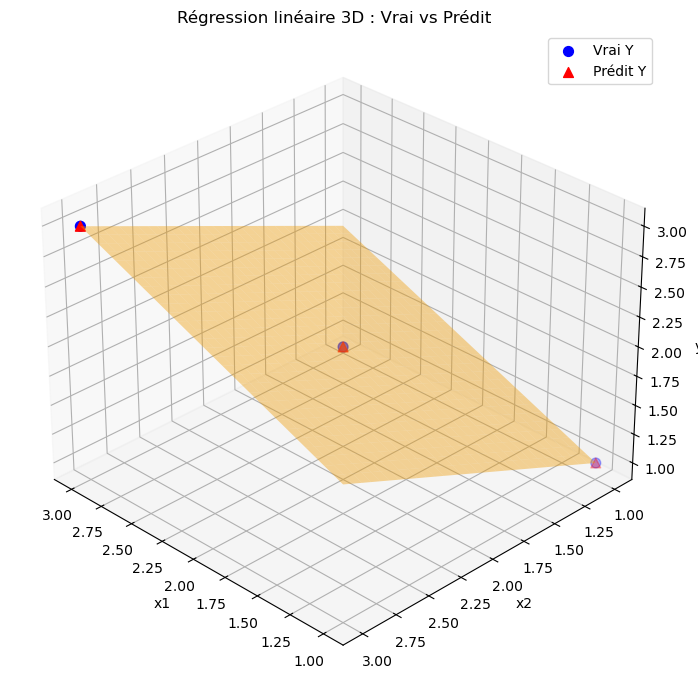

In [8]:

X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

n_samples, n_features = X.shape

# === Créer et entraîner le modèle PSEUDO-INVERSE (en une seule étape) ===
X_flat = X.flatten().astype(np.float64)
Y_float = Y.astype(np.float64)

model_ptr = lib.create_linear_model_pseudo_inverse(
    X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features
)

# === Prédiction sur X
Y_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in X
])



# === Affichage résultats
for x, y_true, y_hat in zip(X, Y, Y_pred):
    print(f"x = {x[0]:.1f} → y attendu = {y_true:.1f}, y prédit = {y_hat:.3f}")

mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(np.mean((Y - Y_pred)**2))
value_range = Y.max() - Y.min()
accuracy_pct = 100 * (1 - rmse / value_range) if value_range > 0 else 100.0

print(f"\nMAE (erreur absolue moyenne) : {mae:.4f}")
print(f"RMSE (erreur quadratique moyenne) : {rmse:.4f}")
print(f"Précision relative : {accuracy_pct:.2f}%")

# === Visualisation 3D pour 2 features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Points réels (Y) en bleu
ax.scatter(X[:, 0], X[:, 1], Y, c='blue', label="Vrai Y", s=50)

# Points prédits (predictions) en rouge
ax.scatter(X[:, 0], X[:, 1], Y_pred, c='red', label="Prédit Y", marker='^', s=50)

# Segments entre vrai et prédit
for i in range(len(Y)):
    x0, x1 = X[i, 0], X[i, 1]
    y_true = Y[i]
    y_pred = Y_pred[i]
    ax.plot([x0, x0], [x1, x1], [y_true, y_pred], color='gray', linestyle='--', linewidth=1)

# Grille pour surface
x_grid, y_grid = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
)

xy_grid = np.c_[x_grid.ravel(), y_grid.ravel()]  # 2 colonnes seulement

z_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        point.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    ) for point in xy_grid
])
z_grid = z_pred.reshape(x_grid.shape)

# Surface prédite
ax.plot_surface(x_grid, y_grid, z_grid, color='orange', alpha=0.4)

# Axes et titres
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Régression linéaire 3D : Vrai vs Prédit")

ax.view_init(elev=30, azim=135)
ax.legend()
plt.tight_layout()
plt.show()

### Non Linear Simple 3D :
        Linear Model       : KO

x = 1.0 → y attendu = 2.0, y prédit = 0.500
x = 0.0 → y attendu = 1.0, y prédit = -0.500
x = 1.0 → y attendu = -2.0, y prédit = -0.500
x = 0.0 → y attendu = -1.0, y prédit = 0.500

MAE (erreur absolue moyenne) : 1.5000
RMSE (erreur quadratique moyenne) : 1.5000
Précision relative : 62.50%


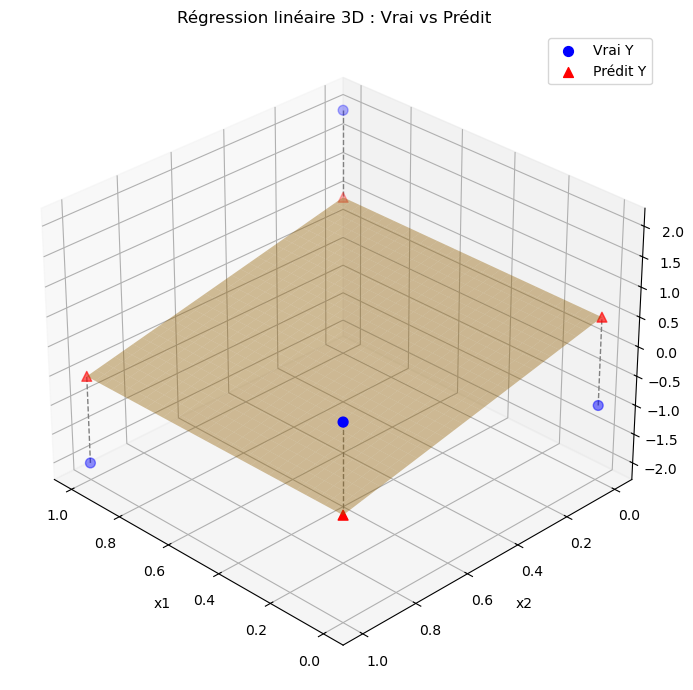

In [9]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

n_samples, n_features = X.shape

# === Créer et entraîner le modèle PSEUDO-INVERSE (en une seule étape) ===
X_flat = X.flatten().astype(np.float64)
Y_float = Y.astype(np.float64)

model_ptr = lib.create_linear_model_pseudo_inverse(
    X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features
)

# === Prédiction sur X
Y_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        x.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    )
    for x in X
])



# === Affichage résultats
for x, y_true, y_hat in zip(X, Y, Y_pred):
    print(f"x = {x[0]:.1f} → y attendu = {y_true:.1f}, y prédit = {y_hat:.3f}")

mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(np.mean((Y - Y_pred)**2))
value_range = Y.max() - Y.min()
accuracy_pct = 100 * (1 - rmse / value_range) if value_range > 0 else 100.0

print(f"\nMAE (erreur absolue moyenne) : {mae:.4f}")
print(f"RMSE (erreur quadratique moyenne) : {rmse:.4f}")
print(f"Précision relative : {accuracy_pct:.2f}%")

# === Visualisation 3D pour 2 features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Points réels (Y) en bleu
ax.scatter(X[:, 0], X[:, 1], Y, c='blue', label="Vrai Y", s=50)

# Points prédits (predictions) en rouge
ax.scatter(X[:, 0], X[:, 1], Y_pred, c='red', label="Prédit Y", marker='^', s=50)

# Segments entre vrai et prédit
for i in range(len(Y)):
    x0, x1 = X[i, 0], X[i, 1]
    y_true = Y[i]
    y_pred = Y_pred[i]
    ax.plot([x0, x0], [x1, x1], [y_true, y_pred], color='gray', linestyle='--', linewidth=1)

# Grille pour surface
x_grid, y_grid = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
)

xy_grid = np.c_[x_grid.ravel(), y_grid.ravel()]  # 2 colonnes seulement

z_pred = np.array([
    lib.predict_linear_model_pseudo_inverse(
        model_ptr,
        point.astype(np.float64).ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        n_features
    ) for point in xy_grid
])
z_grid = z_pred.reshape(x_grid.shape)

# Surface prédite
ax.plot_surface(x_grid, y_grid, z_grid, color='orange', alpha=0.4)

# Axes et titres
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Régression linéaire 3D : Vrai vs Prédit")

ax.view_init(elev=30, azim=135)
ax.legend()
plt.tight_layout()
plt.show()